In [1]:
using JSON
using PyPlot

PyPlot.matplotlib[:rc]("text", usetex=true) # allow tex rendering
PyPlot.matplotlib[:rc]("font", family="serif") 

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

Dict{String,Any} with 4 entries:
  "family" => "serif"
  "weight" => "normal"
  "color"  => "k"
  "size"   => 14

In [2]:
norObjFunDict = readstring("./results/norObjFunDict.json");
norObjFunDict = JSON.parse(norObjFunDict);

demandsDiffDictCar = readstring("./results/demandsDiffDictCar.json");
demandsDiffDictCar = JSON.parse(demandsDiffDictCar);

demandsDiffDictTruck = readstring("./results/demandsDiffDictTruck.json");
demandsDiffDictTruck = JSON.parse(demandsDiffDictTruck);

objInvVIDict = readstring("./results/objInvVIDict.json");
objInvVIDict = JSON.parse(objInvVIDict);

coeffs_dict = readstring("./results/coeffs_dict.json");
coeffs_dict = JSON.parse(coeffs_dict);

tapFlowVecDict = readstring("./results/tapFlowVecDict.json");
tapFlowVecDict = JSON.parse(tapFlowVecDict);

link_capac_dict = readstring("../temp_files/link_capac_dict_Anaheim.json");
link_capac_dict = JSON.parse(link_capac_dict);

In [3]:
link_capac_vec = [link_capac_dict["$i"] for i=0:length(link_capac_dict)-1];

In [4]:
epsilon_2 = 1e-20

numIter = Int64[]

for l = 1:length(norObjFunDict)
    if norObjFunDict["$l"] - norObjFunDict["$(l+1)"] < epsilon_2
        push!(numIter, l)
        break
    end
end

In [5]:
# update plots based on convergence rate
N = numIter[1];

In [6]:
max_scaled_flow = maximum([(1.0 * tapFlowVecDict["$N"][i][1] + 2.0 * tapFlowVecDict["$N"][i][2]) / 
    link_capac_vec[i] for i = 1:length(link_capac_vec)])

2.430699775744086

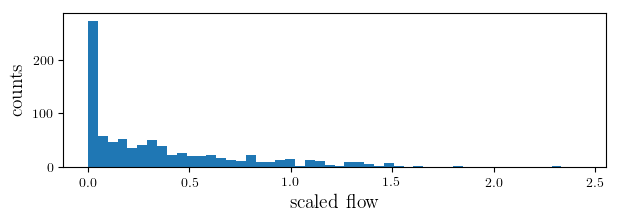

In [7]:
#################
#  Create Data  #
#################

fig = figure(figsize=(7,2))

x = [(1.0 * tapFlowVecDict["$N"][i][1] + 2.0 * tapFlowVecDict["$N"][i][2]) / 
    link_capac_vec[i] for i = 1:length(link_capac_vec)] # Values
nbins = 50 # Number of bins

##########
#  Plot  #
##########
# fig = figure("pyplot_histogram",figsize=(6,3)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](x,nbins) # Histogram

# grid("on")
xlabel("scaled flow", fontdict=font1)
ylabel("counts", fontdict=font1)

savefig("./results/scaled_flow_histogram_Anaheim_multi_class.pdf")

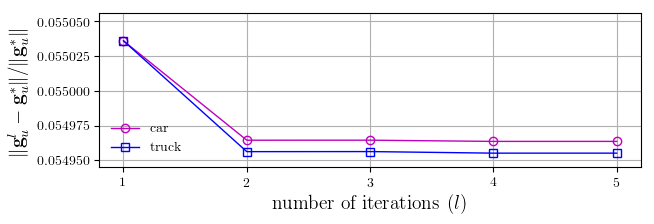

In [8]:
iterNum = 1:(N+1)

demandsDiffCar = map(iterNum->demandsDiffDictCar["$iterNum"], iterNum)
demandsDiffTruck = map(iterNum->demandsDiffDictTruck["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(7,2))

plot(iterNum, demandsDiffCar, "o-m", label="car", linewidth=1, 
markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

plot(iterNum, demandsDiffTruck, "s-b", label="truck", linewidth=1, 
markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

legend(loc="lower left", fancybox="true", frameon=false) 

grid("on")

xlim(.8, N + 1 + .2)
ylim(minimum(demandsDiffTruck)-.00001, maximum(demandsDiffTruck)+.00002)

xticks(1:N+1)

xlabel(L"number of iterations ($l$)", fontdict=font1)
ylabel(L"$\|\textbf{g}_u^l - \textbf{g}_u^*\| / \| \textbf{g}_u^* \|$", fontdict=font1)

savefig("./results/demandsDiff_biLev_Anaheim_multi_class.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "demandsDiff_biLev_Anaheim_multi_class.pdf", dpi=300, bbox_inches="tight")

In [9]:
normObjInvVIDict = Dict{}()

for key in keys(objInvVIDict)
    normObjInvVIDict[key] = objInvVIDict[key] / objInvVIDict["1"]
end

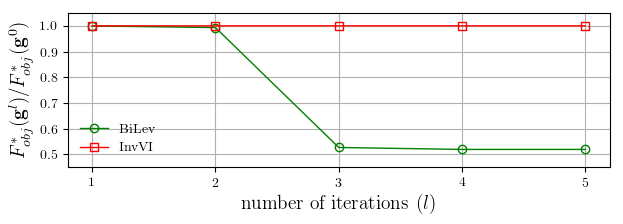

In [10]:
iterNum = 1:N+1

objFunBiLev = map(iterNum->norObjFunDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

fig = figure(figsize=(7,2))

plot(iterNum, objFunBiLev, "o-g", label="BiLev", linewidth=1, 
markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

objFunInv = map(iterNum->normObjInvVIDict["$iterNum"], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFunInv, "s-r", label="InvVI", linewidth=1, 
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

# plot(iterNum, demandsDiff, "o-r", linewidth=1,
# markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

legend(loc="lower left", fancybox="true", frameon=false) 

grid("on")

xlim(0.8, N + 1.2)
ylim(0.45, 1.05)

xticks(1:N+1)
yticks(0.5:0.1:1.0)

xlabel(L"number of iterations ($l$)", fontdict=font1)
ylabel(L"$F^*_{\text{obj}}(\textbf{g}^l)/F^*_{\text{obj}}(\textbf{g}^0)$", fontdict=font1)

savefig("./results/objFun_Anaheim_multi_class.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "objFun_Anaheim_multi_class.pdf", dpi=300, bbox_inches="tight")

In [11]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)]);

In [12]:
keys(coeffs_dict)

Base.KeyIterator for a Dict{String,Any} with 5 entries. Keys:
  "(6,1.5,0.1,2)"
  "(6,1.5,0.1,1)"
  "(6,1.5,0.1,3)"
  "(6,1.5,0.1,5)"
  "(6,1.5,0.1,4)"

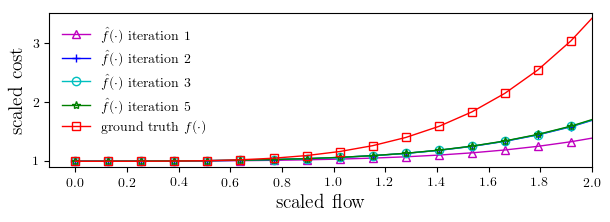

In [13]:
iterN_1 = 1
iterN_2 = 2
iterN_3 = 3
iterN_4 = N+1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs_1 = coeffs_dict["(6,1.5,0.1,$iterN_1)"]
est_coeffs_2 = coeffs_dict["(6,1.5,0.1,$iterN_2)"]
est_coeffs_3 = coeffs_dict["(6,1.5,0.1,$iterN_3)"]
est_coeffs_4 = coeffs_dict["(6,1.5,0.1,$iterN_4)"]

xs = linspace(0, max_scaled_flow, 20)
xs_true = linspace(0, max_scaled_flow, 20)

zs_true = map(x->polyEval(true_coeffs, x), xs_true)

zs_1 = map(x->polyEval(est_coeffs_1, x), xs)
zs_2 = map(x->polyEval(est_coeffs_2, x), xs)
zs_3 = map(x->polyEval(est_coeffs_3, x), xs)
zs_4 = map(x->polyEval(est_coeffs_4, x), xs)

fig = figure(figsize=(7,2))

plot(xs, zs_1, "^-m", label=L"$\hat f(\cdot)$ iteration 1", linewidth=1, 
markerfacecolor="None", markeredgecolor="m", markeredgewidth=1)

plot(xs, zs_2, "+-b", label=L"$\hat f(\cdot)$ iteration 2", linewidth=1, 
markerfacecolor="None", markeredgecolor="b", markeredgewidth=1)

plot(xs, zs_3, "o-c", label=L"$\hat f(\cdot)$ iteration 3", linewidth=1, 
markerfacecolor="None", markeredgecolor="c", markeredgewidth=1)

plot(xs, zs_4, "*-g", label=L"$\hat f(\cdot)$ iteration" * " $(N+1)", linewidth=1, 
markerfacecolor="None", markeredgecolor="g", markeredgewidth=1)

plot(xs_true, zs_true, "s-r", label=L"ground truth $f(\cdot)$", linewidth=1, 
markerfacecolor="None", markeredgecolor="r", markeredgewidth=1)

legend(loc="upper left",fancybox="true", frameon=false) 

# grid("on")
# xlim(-0.1, max_scaled_flow);
xlim(-0.1, 2);
ylim(0.9, 3.5);

xticks(0:0.2:2)

xlabel("scaled flow", fontdict=font1)
ylabel("scaled cost", fontdict=font1)

savefig("./results/fitting_Anaheim_multi_class.pdf")

dire = "/home/jzh/Dropbox/Research/Data-driven_estimation_inverse_optimization/" * 
"Joint_problem_and_multi_class_Traffic/imag/"

savefig(dire * "fitting_Anaheim_multi_class.pdf", dpi=300, bbox_inches="tight")